In [4]:
stock_info.items()

dict_items([('종목명', '삼성전자'), ('종가', '53000'), ('전일 대비', '-2000'), ('등락률', '-3.64'), ('시가', '54600'), ('고가', '54600'), ('저가', '53000'), ('거래량', '37962881'), ('거래대금', '2037790866499'), ('시가총액', '316398475150000')])

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_31177/2531466339.py:43: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  plt.tight_layout()
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_31177/2531466339.py:43: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  plt.tight_layout()
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_31177/2531466339.py:43: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  plt.tight_layout()
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_31177/2531466339.py:43: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_31177/2531466339.py:43: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_31177/2531466339.py:43: UserWa

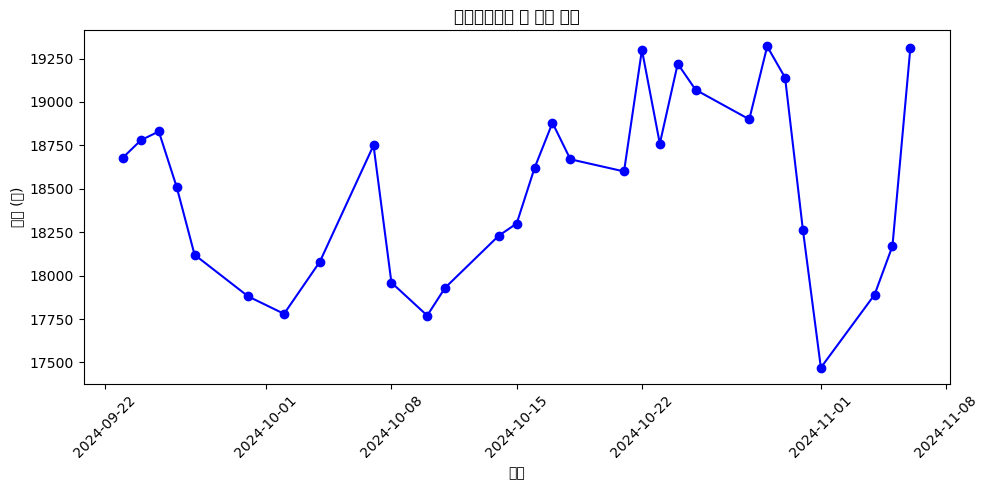

In [4]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

# 발급받은 인코딩된 서비스키를 사용하세요.
service_key = 'Q0KvEVbeB1hi3GV3FuOvbdn%2FWJGeUcU6TTTo3x3sQSvfSH5JzLuvrzDT3hUYfN6%2F3jdXnJw1VQfFSZvEBnVuFQ%3D%3D'

# 요청할 종목명 설정
stock_name = '한화시스템'

# 한 달(30일)치 데이터를 요청할 URL 구성
url = f"https://apis.data.go.kr/1160100/service/GetStockSecuritiesInfoService/getStockPriceInfo?serviceKey={service_key}&numOfRows=30&pageNo=1&resultType=json&itmsNm={stock_name}"

# API 요청을 보냅니다.
response = requests.get(url)

# 응답 상태 코드가 200일 경우 데이터 출력
if response.status_code == 200:
    data = response.json()
    items = data.get('response', {}).get('body', {}).get('items', {}).get('item', [])
    
    # 날짜와 종가 데이터를 저장할 리스트 초기화
    dates = []
    closing_prices = []
    
    # 각 날짜와 종가를 리스트에 저장
    for item in items:
        date = datetime.strptime(item.get('basDt'), '%Y%m%d')
        closing_price = float(item.get('clpr', 0))  # 종가
        dates.append(date)
        closing_prices.append(closing_price)
    
    # 날짜 순서로 정렬 (API에서 최신순으로 반환할 수 있으므로)
    dates, closing_prices = zip(*sorted(zip(dates, closing_prices)))
    
    # 그래프 그리기
    plt.figure(figsize=(10, 5))
    plt.plot(dates, closing_prices, marker='o', linestyle='-', color='b')
    plt.title(f"{stock_name}의 한 달치 종가")
    plt.xlabel("날짜")
    plt.ylabel("종가 (원)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"API 호출 실패: {response.status_code}")

In [5]:
import requests
from datetime import datetime

# 발급받은 인코딩된 서비스키를 사용하세요.
service_key = 'Q0KvEVbeB1hi3GV3FuOvbdn%2FWJGeUcU6TTTo3x3sQSvfSH5JzLuvrzDT3hUYfN6%2F3jdXnJw1VQfFSZvEBnVuFQ%3D%3D'

# 요청할 종목명 설정
stock_name = '한화시스템'

# 한 달(30일)치 데이터를 요청할 URL 구성
url = f"https://apis.data.go.kr/1160100/service/GetStockSecuritiesInfoService/getStockPriceInfo?serviceKey={service_key}&numOfRows=30&pageNo=1&resultType=json&itmsNm={stock_name}"

# API 요청을 보냅니다.
response = requests.get(url)

# 응답 상태 코드가 200일 경우 데이터 출력
if response.status_code == 200:
    data = response.json()
    items = data.get('response', {}).get('body', {}).get('items', {}).get('item', [])
    
    # 종가 데이터를 저장할 리스트 초기화
    closing_prices = []
    
    # 각 종가를 리스트에 저장
    for item in items:
        closing_price = float(item.get('clpr', 0))  # 종가
        closing_prices.append(closing_price)
    
    # 최신순으로 가져왔으므로 날짜 순서로 정렬
    closing_prices = closing_prices[::-1]  # 리스트 역순으로 정렬
    
    # 종가 리스트 출력
    print("한 달치 종가 리스트:", closing_prices)
else:
    print(f"API 호출 실패: {response.status_code}")

한 달치 종가 리스트: [18680.0, 18780.0, 18830.0, 18510.0, 18120.0, 17880.0, 17780.0, 18080.0, 18750.0, 17960.0, 17770.0, 17930.0, 18230.0, 18300.0, 18620.0, 18880.0, 18670.0, 18600.0, 19300.0, 18760.0, 19220.0, 19070.0, 18900.0, 19320.0, 19140.0, 18260.0, 17470.0, 17890.0, 18170.0, 19310.0]


# 종목명 - 종목코드 매칭 함수 + .ks

In [76]:
import requests

def get_stock_code(api_key, company_name):
    """
    공공데이터포털 API를 통해 기업명으로 종목 코드를 조회하는 함수
    """
    # 종목명으로 주가 정보를 조회하는 URL
    url = f"https://apis.data.go.kr/1160100/service/GetStockSecuritiesInfoService/getStockPriceInfo?serviceKey={api_key}&numOfRows=1&pageNo=1&resultType=json&itmsNm={company_name}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        items = data.get('response', {}).get('body', {}).get('items', {}).get('item', [])
        
        # 데이터가 존재하면 종목명과 종목코드 반환
        if items:
            stock_data = items[0]
            return stock_data.get('srtnCd')  # 종목코드 반환
        else:
            print(f"{company_name}에 대한 종목 코드를 찾을 수 없습니다.")
            return None
    else:
        print("공공데이터포털 API 호출 실패:", response.status_code)
        return None

# 예제 사용: 기업명을 입력받아 종목 코드 조회
api_key = 'Q0KvEVbeB1hi3GV3FuOvbdn%2FWJGeUcU6TTTo3x3sQSvfSH5JzLuvrzDT3hUYfN6%2F3jdXnJw1VQfFSZvEBnVuFQ%3D%3D'  # 공공데이터포털 API 키를 입력하세요
company_name = input("조회할 기업명을 입력하세요: ")
stock_code = get_stock_code(api_key, company_name)

# 결과 출력
if stock_code:
    print(f"{company_name}의 종목 코드: {stock_code}")
else:
    print(f"{company_name}의 종목 코드를 찾을 수 없습니다.")

조회할 기업명을 입력하세요:  현대차


현대차의 종목 코드: 005380


# 360일 치 주가 제공하는 함수

In [1]:
import yfinance as yf

def get_stock_prices_360_days(ticker):
    """
    주어진 티커(ticker)를 입력받아 최근 360일간의 종가, 시가, 저가, 고가를 리스트로 반환하는 함수
    """
    # Yahoo Finance에서 해당 종목의 Ticker 객체 생성
    stock_data = yf.Ticker(ticker)
    
    # 최근 1년치의 일별 주가 데이터 가져오기
    historical_data = stock_data.history(period="1y")
    
    # 종가, 시가, 고가, 저가 데이터를 리스트로 추출
    closing_prices = historical_data['Close'].tolist()
    opening_prices = historical_data['Open'].tolist()
    high_prices = historical_data['High'].tolist()
    low_prices = historical_data['Low'].tolist()
    
    # 결과를 딕셔너리 형태로 반환
    return {
        "종가": closing_prices,
        "시가": opening_prices,
        "고가": high_prices,
        "저가": low_prices
    }

# 예제 사용: 삼성전자의 종목 코드 ('005930.KS'는 삼성전자의 한국 거래소 코드입니다)
ticker = "005930.KS"
stock_prices_360_days = get_stock_prices_360_days(ticker)

# 결과 출력
if stock_prices_360_days:
    print(f"{ticker}의 최근 360일 주가 정보:")
    for key, values in stock_prices_360_days.items():
        print(f"{key}: {values[:5]} ...")  # 앞 5개의 데이터만 출력 (리스트가 길어지므로)
else:
    print(f"{ticker}에 대한 데이터를 가져오지 못했습니다.")

005930.KS의 최근 360일 주가 정보:
종가: [69446.421875, 70819.65625, 71408.1796875, 71113.90625, 71310.0859375] ...
시가: [69642.59820798022, 70231.12725069252, 71113.9152107658, 70917.72995689655, 70721.55703017538] ...
고가: [69740.68637447034, 70819.65625, 71604.3560053228, 71604.34698275862, 71604.35039116231] ...
저가: [69250.24554201978, 70133.03908414127, 70917.738892943, 70917.72995689655, 70721.55703017538] ...


In [84]:
stock_prices_360_days['종가']

50800.0

# 전체 재무정보 반환하는 함수 

In [88]:
import yfinance as yf

def get_full_stock_info(ticker):
    """
    주어진 티커(ticker)를 입력받아 종가, 시가, 저가, 고가, 시가총액, 당기순이익, 총주식수를 반환하는 함수
    """
    # Yahoo Finance에서 해당 종목의 Ticker 객체 생성
    stock_data = yf.Ticker(ticker)
    
    # 주가 데이터 가져오기 (최근 5일 데이터를 가져와 최신 데이터 사용)
    historical_data = stock_data.history(period="5d")
    latest_data = historical_data.iloc[-1] if not historical_data.empty else None

    # 종목의 정보 가져오기
    info = stock_data.info
    
    # 데이터 추출
    result = {
        "종가": latest_data['Close'] if latest_data is not None else 'N/A',
        "시가": latest_data['Open'] if latest_data is not None else 'N/A',
        "고가": latest_data['High'] if latest_data is not None else 'N/A',
        "저가": latest_data['Low'] if latest_data is not None else 'N/A',
        "시가총액": info.get('marketCap', 'N/A'),
        "당기순이익": info.get('netIncomeToCommon', 'N/A'),
        "총주식수": info.get('sharesOutstanding', 'N/A')
    }
    
    return result

# 예제 사용: 삼성전자의 종목 코드 ('005930.KS'는 삼성전자의 한국 거래소 코드입니다)
ticker = "005930.KS"
stock_info = get_full_stock_info(ticker)

# 결과 출력
print(f"{ticker}의 종합 재무 정보:")
for key, value in stock_info.items():
    print(f"{key}: {value}")

005930.KS의 종합 재무 정보:
종가: 50700.0
시가: 50200.0
고가: 51800.0
저가: 50200.0
시가총액: 337833369796608
당기순이익: 32064430669824
총주식수: 5969780224


# 주가예측 함수
- 앞서 알아본 180일 종가 리스트를 인자로 넣는다.

In [4]:
stock_value=stock_prices_360_days['종가']

In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

def predict_next_day_price(closing_prices):
    # 데이터 전처리
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(np.array(closing_prices).reshape(-1, 1))

    # 학습 데이터 생성 (60일 데이터로 다음날을 예측)
    sequence_length = 60
    x_train, y_train = [], []

    for i in range(sequence_length, len(scaled_data)):
        x_train.append(scaled_data[i-sequence_length:i, 0])
        y_train.append(scaled_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # LSTM 모델 구성
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
        LSTM(units=50, return_sequences=False),
        Dense(units=25),
        Dense(units=1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=1, epochs=10, verbose=1)

    # 다음날 예측하기 위한 입력 데이터 생성 (마지막 60일 데이터)
    last_60_days = scaled_data[-sequence_length:]
    X_test = np.reshape(last_60_days, (1, sequence_length, 1))

    # 예측 및 스케일 복원
    predicted_price = model.predict(X_test)
    predicted_price = scaler.inverse_transform(predicted_price)

    return predicted_price[0][0]


In [5]:
# 예측 실행
predicted_price = predict_next_day_price(stock_value)
print(f"예측된 내일 종가: {predicted_price}")

Metal device set to: Apple M2 Pro


2024-11-14 16:21:53.882607: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-14 16:21:53.883014: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2024-11-14 16:21:54.449791: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-11-14 16:21:55.679943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-14 16:21:55.864531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-14 16:21:56.204984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-14 16:21:56.598938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-14 16:21:57.936444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


185/185 [==============================] - 11s 32ms/step - loss: 0.0208
Epoch 2/10
185/185 [==============================] - 6s 31ms/step - loss: 0.0090
Epoch 3/10
185/185 [==============================] - 6s 30ms/step - loss: 0.0065
Epoch 4/10
185/185 [==============================] - 6s 30ms/step - loss: 0.0048
Epoch 5/10
185/185 [==============================] - 6s 32ms/step - loss: 0.0045
Epoch 6/10
185/185 [==============================] - 6s 31ms/step - loss: 0.0048
Epoch 7/10
185/185 [==============================] - 6s 32ms/step - loss: 0.0039
Epoch 8/10
185/185 [==============================] - 6s 31ms/step - loss: 0.0041
Epoch 9/10
185/185 [==============================] - 6s 33ms/step - loss: 0.0039
Epoch 10/10
185/185 [==============================] - 6s 32ms/step - loss: 0.0039


2024-11-14 16:22:58.003732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-14 16:22:58.077602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-14 16:22:58.349865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 907ms/step
예측된 내일 종가: 51111.1796875
